### Imports

In [3]:
import matplotlib
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
from pandas_summary import DataFrameSummary

### Data loading

In [4]:
bids = pd.read_csv("data/bids.csv.zip", header=0)

In [5]:
pd.DataFrame(bids.iloc[0])

,0
bid_id,0
bidder_id,8dac2b259fd1c6d1120e519fb1ac14fbqvax8
auction,ewmzr
merchandise,jewelry
device,phone0
time,9759243157894736
country,us
ip,69.166.231.58
url,vasstdc27m7nks3


In [6]:
bidders = pd.read_csv("data/train.csv.zip", header=0)

In [7]:
pd.DataFrame(bidders.iloc[0])

,0
bidder_id,91a3c57b13234af24875c56fb7e2b2f4rb56a
payment_account,a3d2de7675556553a5f08e4c88d2c228754av
address,a3d2de7675556553a5f08e4c88d2c228vt0u4
outcome,0


In [8]:
joined_data = bids.merge(bidders, on="bidder_id")

### Stats on bidders

- Total number of bid

In [9]:
len(bids)

7656334

- Mean number of bid per bidder

In [10]:
bids.groupby("bidder_id").bid_id.size().mean().round()

1158.0

- Mean number of bidder per auction

In [11]:
bids.groupby("auction").bidder_id.size().mean().round()

509.0

- Mean number of bid per auction per bidder

In [12]:
bids.groupby(["auction", "bidder_id"]).bid_id.size().mean().round()

20.0

- Standard deviation

In [13]:
dfs = DataFrameSummary(bids)
dfs.columns_stats

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
counts,7656334,7656334,7656334,7656334,7656334,7656334,7647475,7656334,7656334
uniques,7656334,6614,15051,10,7351,776529,199,2303991,1786351
missing,0,0,0,0,0,0,8859,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0.12%,0%,0%
types,numeric,categorical,categorical,categorical,categorical,numeric,categorical,categorical,categorical


In [14]:
dfs['merchandise']

top             mobile: 2126587
counts                  7656334
uniques                      10
missing                       0
missing_perc                 0%
types               categorical
Name: merchandise, dtype: object

In [15]:
auction_gb = bids.groupby(["auction", "bidder_id"]).bid_id.size().reset_index().groupby("bidder_id")

auction_count = pd.DataFrame(auction_gb.auction.count())
auction_count.columns = ['count']

auction_nunique = pd.DataFrame(auction_gb.auction.nunique())
auction_nunique.columns = ['distinct']

auction_std = auction_gb.std()
auction_std.columns = ['std']


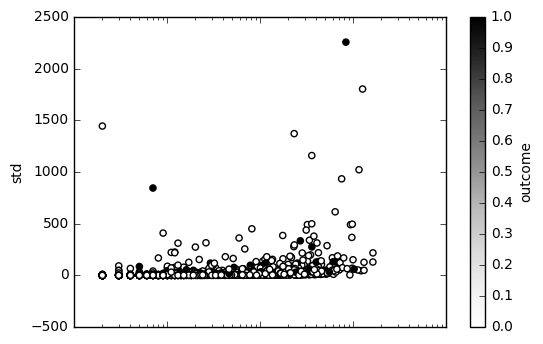

In [16]:
plt.figure()

X = auction_count.join(auction_std).reset_index().merge(bidders[["bidder_id", "outcome"]], on="bidder_id").set_index('bidder_id')
xlabel = X.columns[0]
ylabel = X.columns[1]
X = X[-X[ylabel].isnull()]
ax = X.plot.scatter(x=xlabel ,y=ylabel, c="outcome", logx=True, logy=False)

plt.show()

### Stats on merchandise

In [17]:
bids.groupby("merchandise").size().sort_values(ascending=False)

merchandise
mobile              2126587
jewelry             1902058
sporting goods      1855207
home goods          1224234
office equipment     289838
furniture             99181
computers             81084
books and music       51941
clothing              16447
auto parts             9757
dtype: int64